# WeatherPy Assignment

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config3 import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [6]:
# Create empty lists to append the API data into 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name1 = response["name"]
        print(f"Processing Record {record} | {city_name1}")
        
        # Increase counter by one 
        record = record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Arroyo
Processing Record 2 | Cape Town
Processing Record 3 | Constitucion
City not found. Skipping...
Processing Record 4 | Crestview
Processing Record 5 | Huntington
Processing Record 6 | Saldanha
Processing Record 7 | Arraial do Cabo
Processing Record 8 | Mataura
Processing Record 9 | Hami
Processing Record 10 | Kuching
Processing Record 11 | Atuona
Processing Record 12 | Pyay
Processing Record 13 | Klaksvik
Processing Record 14 | Meulaboh
Processing Record 15 | Albany
Processing Record 16 | Bambous Virieux
Processing Record 17 | Hermanus
Processing Record 18 | Ushuaia
Processing Record 19 | Souillac
Processing Record 20 | Quatre Cocos
City not found. Skipping...
Processing Record 21 | Pervomayskiy
Processing Record 22 | Cidreira
Processing Record 23 | Hofn
Processing Record 24 | Ciudad Bolivar
City not found. Skipping...
Processing Record 25 | Te Anau
City not found. Skipping...
Processing Record 26 | Isang

Processing Record 230 | Mnogovershinnyy
Processing Record 231 | Cabo San Lucas
Processing Record 232 | Saint-Augustin
Processing Record 233 | Artyom
City not found. Skipping...
Processing Record 234 | Vanimo
Processing Record 235 | Verkhoyansk
Processing Record 236 | Kavaratti
Processing Record 237 | Thompson
Processing Record 238 | Humboldt
Processing Record 239 | Novosergiyevka
Processing Record 240 | Kenai
City not found. Skipping...
Processing Record 241 | Demirci
Processing Record 242 | Tsumeb
Processing Record 243 | Qaqortoq
Processing Record 244 | Alofi
Processing Record 245 | Basoda
Processing Record 246 | Inhambane
Processing Record 247 | Strezhevoy
Processing Record 248 | Lorengau
Processing Record 249 | Ahipara
Processing Record 250 | Bako
Processing Record 251 | Padilla
Processing Record 252 | Morgan City
Processing Record 253 | Naxos
Processing Record 254 | Yulara
Processing Record 255 | Sabang
Processing Record 256 | Xai-Xai
Processing Record 257 | Keti Bandar
Processing 

Processing Record 449 | Severo-Yeniseyskiy
Processing Record 450 | Seymchan
Processing Record 451 | Chemal
Processing Record 452 | Wilkes-Barre
Processing Record 453 | Birjand
City not found. Skipping...
City not found. Skipping...
Processing Record 454 | Ponta do Sol
Processing Record 455 | Skierniewice
City not found. Skipping...
Processing Record 456 | Fare
Processing Record 457 | Oussouye
Processing Record 458 | Yuncheng
Processing Record 459 | Chimbote
Processing Record 460 | Enid
Processing Record 461 | Kiruna
Processing Record 462 | Sola
Processing Record 463 | Foki
Processing Record 464 | Kropotkin
Processing Record 465 | Taiyuan
Processing Record 466 | Khasan
Processing Record 467 | Kodinsk
Processing Record 468 | Port Hedland
Processing Record 469 | Tandil
Processing Record 470 | Mpulungu
Processing Record 471 | Ketchikan
Processing Record 472 | Phuket
Processing Record 473 | Vestmanna
Processing Record 474 | Revda
Processing Record 475 | Talavera de la Reina
Processing Recor

In [7]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_data.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [9]:
# Save data frame to CSV
weather_data.to_csv('output_weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Arroyo,75,BO,1563663501,66,-11.08,-66.08,86.00,0.98
1,Cape Town,0,ZA,1563663263,81,-33.93,18.42,48.99,5.82
2,Constitucion,75,MX,1563663505,33,23.99,-104.67,80.01,8.05
3,Crestview,1,US,1563663506,65,30.76,-86.57,87.01,9.17
4,Huntington,1,US,1563663507,55,40.87,-73.43,96.80,13.87


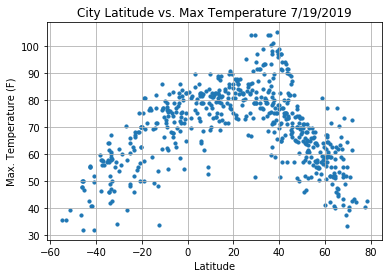

In [10]:
# Build a scatter plot for latitude vs temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Add properties
plt.title("City Latitude vs. Max Temperature 7/19/2019")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_temp.png")

# Show plot
plt.show()

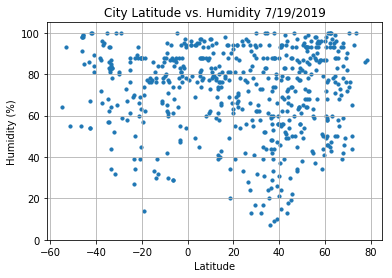

In [17]:
# Build a scatter plot for latitude vs humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Add properties
plt.title("City Latitude vs. Humidity 7/19/2019")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0, 105)

# Save the figure
plt.savefig("lat_hum.png")

# Show plot
plt.show()

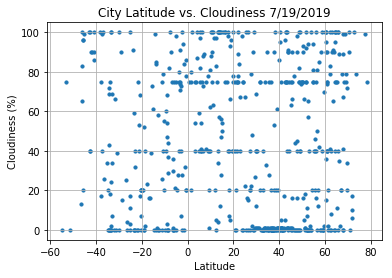

In [19]:
# Build a scatter plot for each latitude vs cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Add properties
plt.title("City Latitude vs. Cloudiness 7/19/2019")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-5, 105)

# Save the figure
plt.savefig("lat_clouds.png")

# Show plot
plt.show()

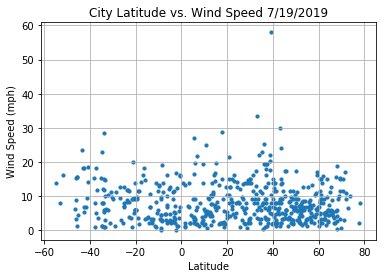

In [20]:
# Make a scatter plot for latitude vs wind speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Add properties
plt.title("City Latitude vs. Wind Speed 7/19/2019")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_wind.png")

# Show plot
plt.show()

Trends Observed:
- Temperatures are highest between 20-40 degrees latitude.
- There does not seem to be a correlation between latitude and wind speed or cloudiness.
- 40 degrees latitude shows the most variation in humidity.